In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle

# Preprocessing

In [2]:
with open('samples_60000.txt','rb') as file:
    samples_60000=pickle.load(file)
samples_60000

,Label,Source_following,Sink_following,Source_follower,Sink_follower,Shortest_path,CN,AAI,JC,PA,RA,HP,LHN,PageRank_Src,PageRank_Sink,ECentrality_Sour,ECentrality_Sink,Degree_Centrality_Sour,Degree_Centrality_Sink
0,1,3797,0,92,78,1,44,5.096773,0.011482,296166,0.009369,0.564103,0.000149,2.086225e-07,2.069415e-07,0.001057,1.402205e-03,7.990327e-04,1.602586e-05
1,1,3805,0,92,99,1,66,7.529112,0.017192,376695,0.011844,0.666667,0.000175,2.083902e-07,2.079313e-07,0.001156,1.374489e-03,8.006764e-04,2.034051e-05
2,1,37,0,10,2,1,1,0.275912,0.025641,74,0.026667,0.500000,0.013514,2.104510e-07,2.094847e-07,0.000099,1.691996e-05,9.656605e-06,4.109194e-07
3,1,3797,0,80,82,1,63,7.206129,0.016505,311354,0.011202,0.768293,0.000202,2.078218e-07,2.074085e-07,0.001048,1.097074e-03,7.965672e-04,1.684769e-05
4,1,4399,0,78,76,1,36,3.320151,0.008108,334324,0.000919,0.473684,0.000108,2.063073e-07,2.058303e-07,0.002824,2.441493e-03,9.198430e-04,1.561494e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,0,10,1,5,0,0.000000,0.000000,1,0.000000,0.000000,0.000000,2.200968e-07,2.047808e-07,0.000043,9.115991e-07,2.260056e-06,2.054597e-07
29996,0,70,0,23,7,3,0,0.000000,0.000000,490,0.000000,0.000000,0.000000,2.285158e-07,2.049167e-07,0.000154,2.831890e-04,1.910775e-05,1.438218e-06
29997,0,38,0,106,2,3,0,0.000000,0.000000,76,0.000000,0.000000,0.000000,2.600614e-07,2.052649e-07,0.000646,2.039260e-05,2.958619e-05,4.109194e-07
29998,0,0,0,4,1,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,2.064072e-07,2.047578e-07,0.000006,4.221924e-05,8.218387e-07,2.054597e-07


In [31]:
with open('teacher_test.txt','rb') as file:
    test_2000=pickle.load(file)
test_2000

,Source_following,Sink_following,Source_follower,Sink_follower,Shortest_path,CN,AAI,JC,PA,RA,HP,LHN,PageRank_Src,PageRank_Sink,ECentrality_Sour,ECentrality_Sink,Degree_Centrality_Sour,Degree_Centrality_Sink
0,21,0,3,29,4,0,0.000000,0.000000,609,0.000000,0.000000,0.000000,2.100194e-07,2.108565e-07,0.000003,0.000786,0.000005,5.958331e-06
1,71,0,13,9,3,0,0.000000,0.000000,639,0.000000,0.000000,0.000000,2.097592e-07,2.196712e-07,0.000126,0.000053,0.000017,1.849137e-06
2,205,0,80,17,2,2,0.404742,0.009050,3485,0.014290,0.117647,0.000574,2.502170e-07,2.185784e-07,0.000656,0.000161,0.000059,3.492815e-06
3,506,0,32,36,2,2,0.178818,0.003697,18216,0.000028,0.055556,0.000110,2.079456e-07,2.060563e-07,0.000892,0.001068,0.000111,7.396548e-06
4,18,0,5,46,3,0,0.000000,0.000000,828,0.000000,0.000000,0.000000,2.059882e-07,2.053494e-07,0.000042,0.001856,0.000005,9.451145e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,53,0,16,2,3,0,0.000000,0.000000,106,0.000000,0.000000,0.000000,2.198319e-07,2.047780e-07,0.000056,0.000039,0.000014,4.109194e-07
1996,95,0,53,41,3,0,0.000000,0.000000,3895,0.000000,0.000000,0.000000,2.553266e-07,2.050740e-07,0.000427,0.001226,0.000030,8.423847e-06
1997,27,0,6,2,3,0,0.000000,0.000000,54,0.000000,0.000000,0.000000,2.064844e-07,2.049514e-07,0.000123,0.000033,0.000007,4.109194e-07
1998,56,0,7,3,3,0,0.000000,0.000000,168,0.000000,0.000000,0.000000,2.287362e-07,2.048797e-07,0.000073,0.000063,0.000013,6.163790e-07


# Feature difference between positive & negative samples

In [3]:
sample_data_1=samples_60000[samples_60000['Label']==1]

In [4]:
sample_data_0=samples_60000[samples_60000['Label']==0]

### Source_following - significant difference

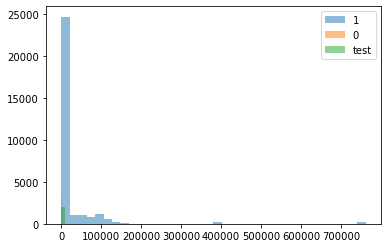

In [34]:
plt.hist(sample_data_1['Source_following'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Source_following'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

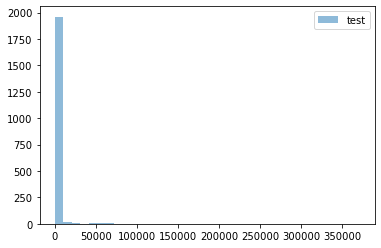

In [36]:
plt.hist(test_2000['Source_following'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

In [7]:
sample_data_0['Source_following'].describe()

count    30000.000000
mean       337.930833
std        728.582510
min          0.000000
25%         45.000000
50%        119.000000
75%        310.000000
max      12543.000000
Name: Source_following, dtype: float64

In [8]:
sample_data_1['Source_following'].describe()

count     30000.000000
mean      21325.005333
std       72129.312911
min           2.000000
25%         195.000000
50%         970.000000
75%        7710.000000
max      761793.000000
Name: Source_following, dtype: float64

### Sink_following

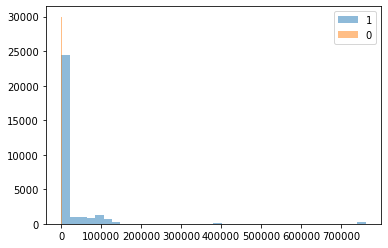

In [37]:
plt.hist(sample_data_1['Sink_following'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Sink_following'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

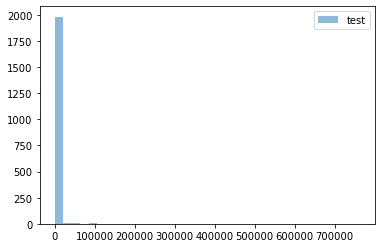

In [39]:
plt.hist(test_2000['Sink_following'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

In [10]:
sample_data_0['Sink_following'].describe()

count    30000.000000
mean         5.306633
std        371.319467
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      59457.000000
Name: Sink_following, dtype: float64

In [11]:
sample_data_1['Sink_following'].describe()

count     30000.000000
mean      22671.284467
std       78343.204845
min           0.000000
25%          71.000000
50%         473.500000
75%        7394.000000
max      761793.000000
Name: Sink_following, dtype: float64

### Source_follower

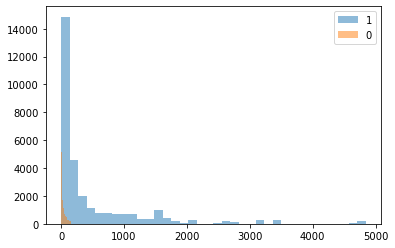

In [12]:
plt.hist(sample_data_1['Source_follower'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Source_follower'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

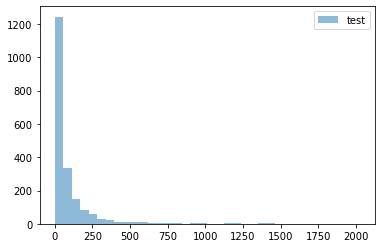

In [40]:
plt.hist(test_2000['Source_follower'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### Sink_follower

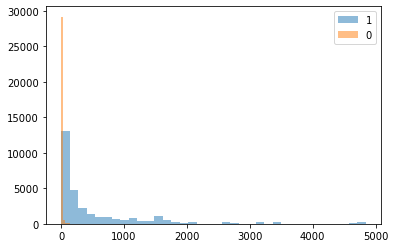

In [13]:
plt.hist(sample_data_1['Sink_follower'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Sink_follower'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

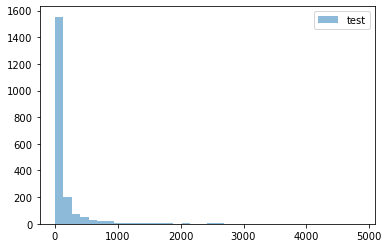

In [41]:
plt.hist(test_2000['Sink_follower'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### Shortest_path

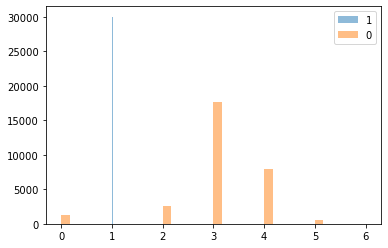

In [14]:
plt.hist(sample_data_1['Shortest_path'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Shortest_path'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

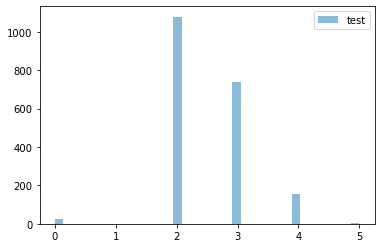

In [42]:
plt.hist(test_2000['Shortest_path'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### CN

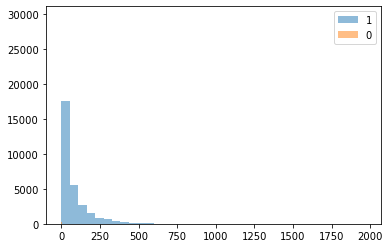

In [15]:
plt.hist(sample_data_1['CN'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['CN'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

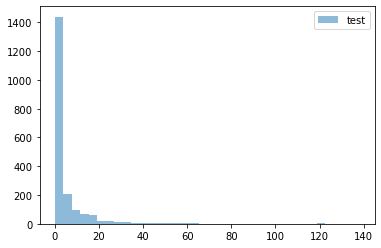

In [43]:
plt.hist(test_2000['CN'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

In [29]:
sample_data_0['CN'].describe()

count    30000.000000
mean         0.124700
std          0.687531
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: CN, dtype: float64

In [30]:
sample_data_1['CN'].describe()

count    30000.000000
mean        79.155033
std        110.143350
min          0.000000
25%         14.000000
50%         39.000000
75%        100.000000
max       1971.000000
Name: CN, dtype: float64

### AAI

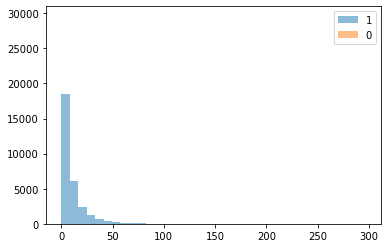

In [16]:
plt.hist(sample_data_1['AAI'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['AAI'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

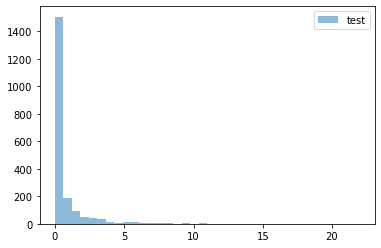

In [44]:
plt.hist(test_2000['AAI'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### JC

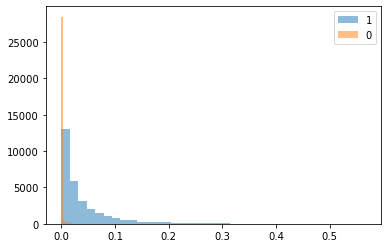

In [17]:
plt.hist(sample_data_1['JC'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['JC'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

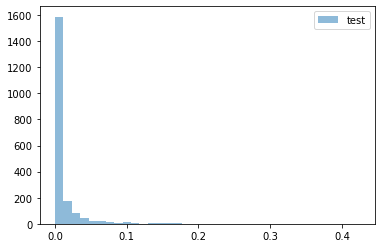

In [45]:
plt.hist(test_2000['JC'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### PA

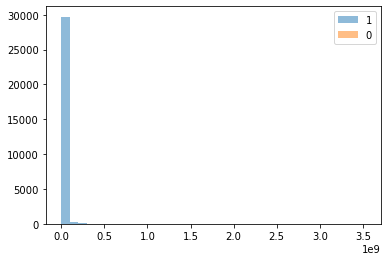

In [18]:
plt.hist(sample_data_1['PA'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['PA'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

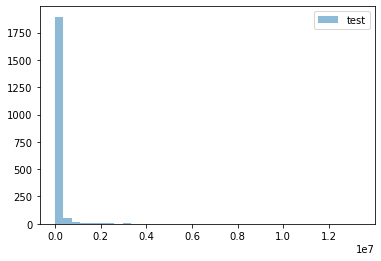

In [46]:
plt.hist(test_2000['PA'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### RA

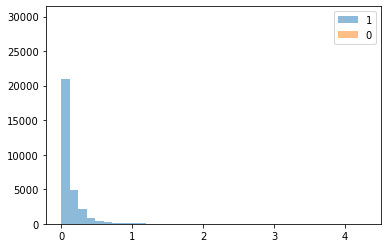

In [19]:
plt.hist(sample_data_1['RA'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['RA'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

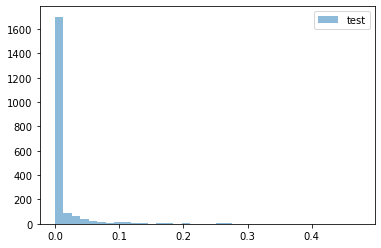

In [47]:
plt.hist(test_2000['RA'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### HP

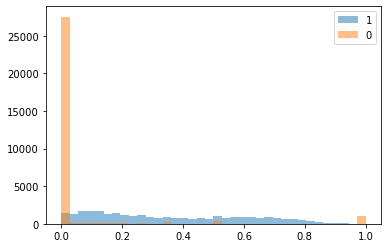

In [20]:
plt.hist(sample_data_1['HP'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['HP'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

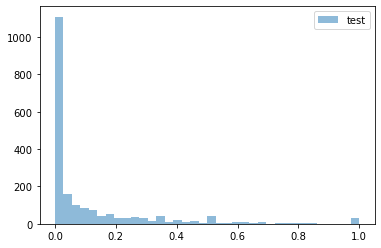

In [48]:
plt.hist(test_2000['HP'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### LHN

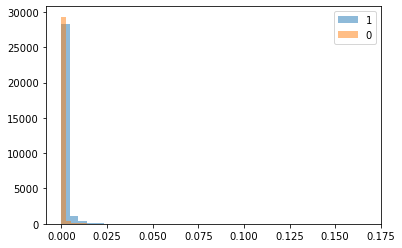

In [21]:

plt.hist(sample_data_1['LHN'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['LHN'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

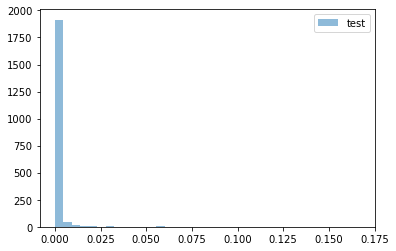

In [49]:
plt.hist(test_2000['LHN'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### PageRank_Src

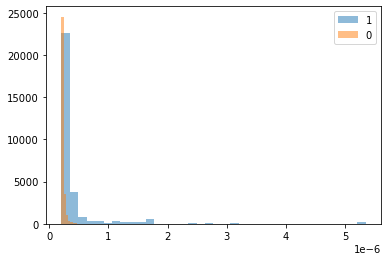

In [22]:

plt.hist(sample_data_1['PageRank_Src'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['PageRank_Src'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

### PageRank_Sink

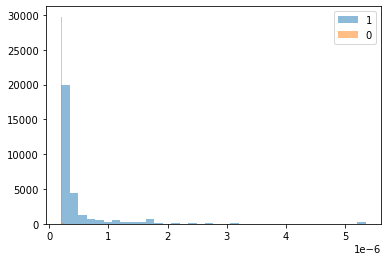

In [50]:

plt.hist(sample_data_1['PageRank_Sink'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['PageRank_Sink'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

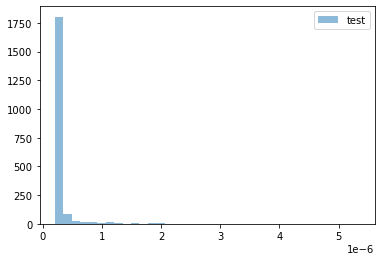

In [51]:
plt.hist(test_2000['PageRank_Sink'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### ECentrality_Sour

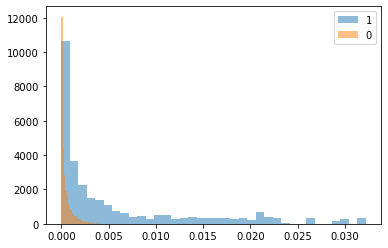

In [25]:
plt.hist(sample_data_1['ECentrality_Sour'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['ECentrality_Sour'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

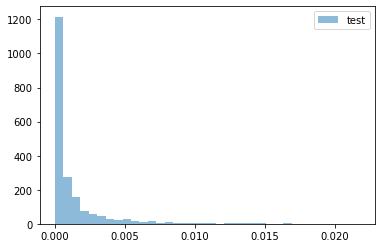

In [52]:
plt.hist(test_2000['ECentrality_Sour'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### ECentrality_Sink

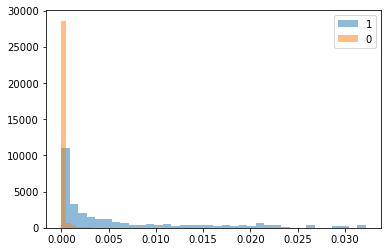

In [26]:
plt.hist(sample_data_1['ECentrality_Sink'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['ECentrality_Sink'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

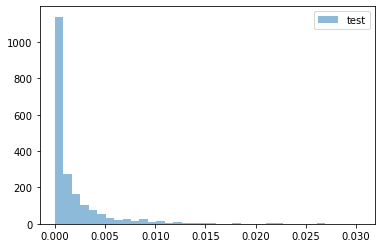

In [53]:
plt.hist(test_2000['ECentrality_Sink'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### Degree_Centrality_Sour

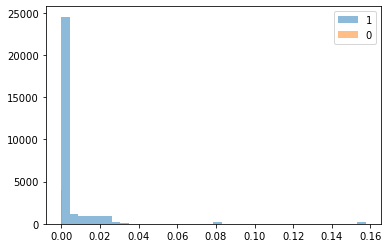

In [27]:
plt.hist(sample_data_1['Degree_Centrality_Sour'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Degree_Centrality_Sour'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

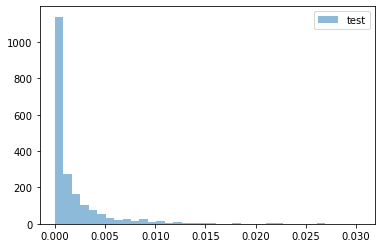

In [54]:
plt.hist(test_2000['ECentrality_Sink'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

### Degree_Centrality_Sink

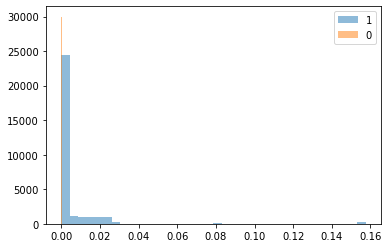

In [28]:
plt.hist(sample_data_1['Degree_Centrality_Sink'],bins = int(180/5),label='1',alpha=0.5)
plt.hist(sample_data_0['Degree_Centrality_Sink'],bins = int(180/5),label='0',alpha=0.5)
plt.legend(loc='upper right')

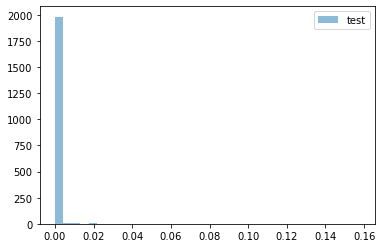

In [55]:
plt.hist(test_2000['Degree_Centrality_Sink'],bins = int(180/5),label='test',alpha=0.5)
plt.legend(loc='upper right')

In [138]:
samples_60000_drop=samples_60000.drop(columns=['Label'])

Text(0.5, 1.0, 'scatterplot')

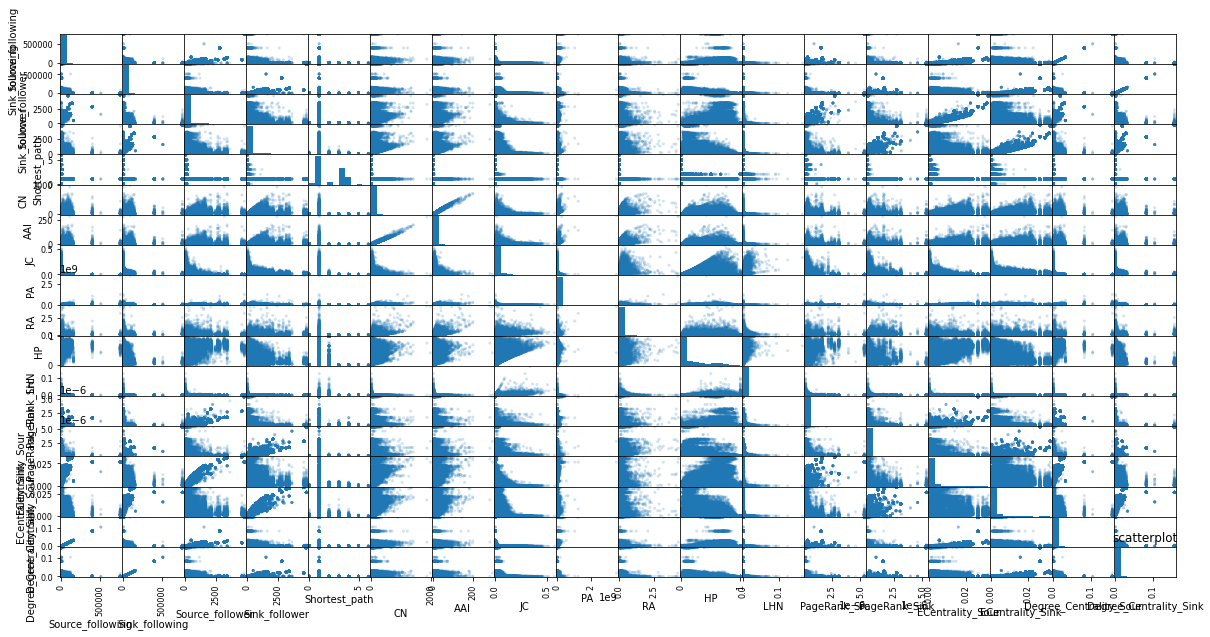

In [141]:
from pylab import rcParams
plt.rcParams.update({'figure.figsize':(20,10)})
pd.plotting.scatter_matrix(samples_60000_drop, alpha=0.2)
plt.title('scatterplot')

# Building model

In [109]:
from sklearn.model_selection import train_test_split
df_x = samples_60000.drop(columns=['Label'])
df_y = samples_60000[['Label']]
x_train, x_test, y_train, y_test  = train_test_split(df_x, df_y, test_size = 0.2, random_state=5)

In [113]:
#x_train
y_train

,Label
5946,0
10175,0
16715,1
16452,1
6444,0
...,...
5814,0
29069,0
20463,1
18638,1


In [124]:
x_train=x_train.drop(columns=['Shortest_path'])
x_test=x_test.drop(columns=['Shortest_path'])

## logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
# use all 19 features
LR_model1 = LogisticRegression(penalty ='none')
LR_model1.fit(x_train,y_train)

LogisticRegression(penalty='none')

In [81]:
label_predict1=LR_model1.predict(x_test)
prob_preidct1=LR_model1.predict_proba(x_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(LR_model1.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6284
           1       0.95      0.99      0.97      5716

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,label_predict1)

0.9735537092964499

In [75]:
with open('ID.txt','rb') as file:
    ID=pickle.load(file)

In [83]:
prob_preidct_test=LR_model1.predict_proba(test_2000)

In [84]:
prob_preidct_test

array([[0.97857551, 0.02142449],
       [0.95548184, 0.04451816],
       [0.69725996, 0.30274004],
       ...,
       [0.95745093, 0.04254907],
       [0.95710253, 0.04289747],
       [0.95717538, 0.04282462]])

In [122]:
def submission(prob_preidct, LR):
    with open(LR, 'w') as file:
        file.write('Id,Predicted\n')
        for i, p in zip(ID, prob_preidct):
            file.write("{},{}\n".format(i, p[1]))

In [86]:
submission(prob_preidct_test, 'LRsubmit1.csv')

In [90]:
#drop Shortest_path
#x_train=x_train.drop(columns=['Shortest_path'])
LR_model2 = LogisticRegression(penalty ='none')
LR_model2.fit(x_train,y_train)

LogisticRegression(penalty='none')

In [91]:
x_test=x_test.drop(columns=['Shortest_path'])

In [92]:
label_predict2=LR_model2.predict(x_test)
prob_preidct2=LR_model2.predict_proba(x_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(LR_model2.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5795
           1       0.97      0.93      0.95      6205

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,label_predict2)

0.94806210718065

In [97]:
prob_preidct_test=LR_model2.predict_proba(test_2000.drop(columns=['Shortest_path']))
prob_preidct_test

array([[0.58180556, 0.41819444],
       [0.59227169, 0.40772831],
       [0.27187759, 0.72812241],
       ...,
       [0.58594505, 0.41405495],
       [0.58754308, 0.41245692],
       [0.59654326, 0.40345674]])

In [98]:
submission(prob_preidct_test, 'LRsubmit2.csv')

In [99]:
from sklearn.model_selection import GridSearchCV
penalty_values = ['l1', 'l2']
c_values = np.logspace(0, 4, 10)
param_grid = {'C' : c_values, 'penalty' : penalty_values}
gs_lr = GridSearchCV(cv = 10, estimator = LogisticRegression(), param_grid = param_grid)

In [100]:
import time
start = time.time()
gs_lr.fit(x_train, y_train)
end = time.time()
print('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  75.45  seconds


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(gs_lr.best_estimator_.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5804
           1       0.97      0.93      0.95      6196

    accuracy                           0.94     12000
   macro avg       0.94      0.95      0.94     12000
weighted avg       0.95      0.94      0.94     12000



In [105]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(gs_lr.best_estimator_.predict(x_test), y_test)

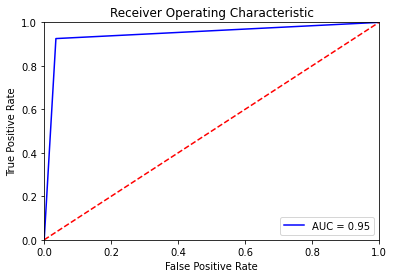

In [106]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
prob_preidct=gs_lr.predict_proba(test_2000.drop(columns=['Shortest_path']))
prob_preidct

array([[0.75227218, 0.24772782],
       [0.77537403, 0.22462597],
       [0.04642691, 0.95357309],
       ...,
       [0.75208606, 0.24791394],
       [0.75498814, 0.24501186],
       [0.76006019, 0.23993981]])

In [108]:
submission(prob_preidct, 'LRsubmit2.csv')

# Random Forest

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn import metrics

In [129]:
clfs = [KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for clf in clfs:
    clf.fit(x_train, y_train)
    print (clf)
    print(clf.score(x_test, y_test))
    predictions = clf.predict(x_test)
    print ("accuracy")
    print (accuracy_score(y_test,predictions))
    print (classification_report(y_test,predictions))
    print("AUC")
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    print(metrics.auc(fpr, tpr))
    probs = clf.predict_proba(x_test)
    print("Prob")
    print(probs)

KNeighborsClassifier()
0.9508333333333333
accuracy
0.9508333333333333
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6063
           1       0.96      0.94      0.95      5937

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000

AUC
0.9507509036204576
Prob
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
DecisionTreeClassifier()
0.9735833333333334
accuracy
0.9735833333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6063
           1       0.97      0.98      0.97      5937

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

AUC
0.9736110489514802
Prob
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
RandomForestClassifier()
0.9

In [130]:
prob_list = []
clfs = [KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for clf in clfs:
    clf.fit(x_train, y_train)
    print (clf)
    predictions = clf.predict(test_2000.drop(columns=['Shortest_path']))
    print("Predictions")
    print(predictions)
    probs = clf.predict_proba(test_2000.drop(columns=['Shortest_path']))
    print("Prob")
    print(probs)
    prob_list.append([probs])

KNeighborsClassifier()
Predictions
[0 0 0 ... 0 0 0]
Prob
[[1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 ...
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]
DecisionTreeClassifier()
Predictions
[0 0 1 ... 0 0 0]
Prob
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
RandomForestClassifier()
Predictions
[0 0 1 ... 0 0 0]
Prob
[[9.99879693e-01 1.20306990e-04]
 [8.79317895e-01 1.20682105e-01]
 [3.00000000e-02 9.70000000e-01]
 ...
 [9.99752166e-01 2.47833691e-04]
 [9.89844646e-01 1.01553537e-02]
 [9.99664774e-01 3.35225899e-04]]


In [131]:
RandomForestClassifier = prob_list[2]

In [132]:
RandomForestClassifier

[array([[9.99879693e-01, 1.20306990e-04],
        [8.79317895e-01, 1.20682105e-01],
        [3.00000000e-02, 9.70000000e-01],
        ...,
        [9.99752166e-01, 2.47833691e-04],
        [9.89844646e-01, 1.01553537e-02],
        [9.99664774e-01, 3.35225899e-04]])]

In [133]:
submission(RandomForestClassifier[0], 'RFsubmit1.csv')

In [134]:
DecisionTreeClassifier = prob_list[1]
DecisionTreeClassifier

[array([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])]

In [135]:
submission(DecisionTreeClassifier[0], 'DTsubmit.csv')

ModuleNotFoundError: No module named 'pandas.tools'